# Exact solution of 2D Ising model

---
## Problem-1

Plot $\ln Z$, $\frac{E}{mn}$, $\frac{C}{mn}$ as a function of temperature $T$ for $m=n=2, 4, 8$, etc. What is the largest size you can reach without overflow?

![Alt text](FSS.png)

---

References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[2-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh^2(2K)}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

---
Define the $c$ function and its derivatives:

In [3]:
def c(T, n):
    beta = 1/(kB*T)
    K = beta*J
    r = np.arange(2*n - 1) + 1        # r = 1, 2, 3, ..., 2n-1
    return np.sinh(2*K) + 1/np.sinh(2*K) - np.cos(r*np.pi/n)
    # Instead of returning a value, the c(T,n) function returns an numpy array of c_r values from r=1 to r=2n-1, that will become easier while computing the product sum.

def c_prime(T):
    beta = 1/(kB*T)
    K = beta*J
    return 2*np.cosh(2*K)*(1 - 1/(np.sinh(2*K))**2)

def c_prime2(T):
    beta = 1/(kB*T)
    K = beta*J
    return 8*(np.cosh(2*K))**2/(np.sinh(2*K))**3 + 4*(np.sinh(2*K) - 1/np.sinh(2*K))

---

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), r \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.

The first deratives of $\gamma_r$ are:
$$ 
  \gamma^\prime_0 = 2 + \frac{1}{\tanh(K)} \frac{1}{\cosh^2(K)}
  = 2 + \frac{2}{\sinh(2K)}
  = 2 (1 + \frac{1}{\sinh(2K)}).
$$

$$
  \gamma^\prime_r = \frac{c^\prime_r}{\sqrt{c^2_r-1}} = c^\prime (c^2_r-1)^{-1/2}, r \neq 0.
$$

The second deratives of $\gamma_r$ are:

$$
  \gamma_0^{\prime\prime} 
  = -4 \csch(2K) \coth(2K)
  = -4 \frac{\cosh{2K}}{\sinh(2K)^2}.
$$

$$
  \gamma_r^{\prime\prime} = \frac{c_r^{\prime\prime}}{\sqrt{c^2-1}} - \frac{ (c^\prime_r)^2 c_r }{ (c^2_r-1)^{3/2} }
  = c^{\prime\prime} (c^2_r-1)^{-1/2} - (c^\prime)^2 c_r (c^2_r-1)^{-3/2}, r \neq 0. 
$$

---
Define $\gamma$ function and its derivatives:

In [4]:
def gamma(T, n):
    beta = 1/(kB*T)
    K = beta*J
    gamma_0 = 2*K + np.log(np.tanh(K))   # r = 0
    gamma_r = np.log(c(T, n) + ((c(T, n))**2 - 1)**0.5)   # r = 1, 2, 3, ..., 2n-1
    gamma = np.append(gamma_0, gamma_r)
    return gamma
    
def gamma_prime(T, n):
    beta = 1/(kB*T)
    K = beta*J
    gamma_prime_0 = 2*(1 + 1/np.sinh(2*K))   # r = 0
    gamma_prime_r = c_prime(T)*((c(T, n))**2 - 1)**-0.5   # r = 1, 2, 3, ..., 2n-1
    gamma_prime = np.append(gamma_prime_0, gamma_prime_r)
    return gamma_prime
    
def gamma_prime2(T, n):
    beta = 1/(kB*T)
    K = beta*J
    gamma_prime2_0 = -4*np.cosh(2*K)/(np.sinh(2*K))**2   # r=0
    gamma_prime2_r = c_prime2(T)*((c(T, n))**2 - 1)**-0.5 - (c_prime(T))**2 * c(T, n) * ((c(T, n))**2 - 1)**-1.5   # r = 1, 2, 3, ..., 2n-1
    gamma_prime2 = np.append(gamma_prime2_0, gamma_prime2_r)
    return gamma_prime2

# Since c(T,n) is an numpy array of c_r values from r=1 to r=2n-1, gamma(T,n), gamma_prime(T,n), gamma_prime2(T, n) returns an numpy array of the corresponding values from r=0 to r=2n-1.
# Check for gamma function and its derivatives:
# T = 1
# n = 3
# print(gamma(T, n))
# print(gamma_prime(T, n))
# print(gamma_prime2(T, n))

Arrange $\gamma$ function and its derivatives from $T_{min}$ to $T_{max}$ in a numpy array:

In [5]:
def gamma_arrange(n, T_min, T_max):
    T_array = np.linspace(T_min, T_max, 1000)
    beta_array = 1/(kB*T_array)
    K_array = beta_array*J
    gamma_array = np.zeros((len(T_array), 2*n))
    gamma_prime_array = np.zeros((len(T_array), 2*n))
    gamma_prime2_array = np.zeros((len(T_array), 2*n))
    for i in range(len(T_array)):
        gamma_array[i, :] = gamma(T_array[i], n)[:]
        gamma_prime_array[i, :] = gamma_prime(T_array[i], n)[:]
        gamma_prime2_array[i, :] = gamma_prime2(T_array[i], n)[:]
    return T_array, K_array, gamma_array, gamma_prime_array, gamma_prime2_array

Plot $\gamma$ function and its derivatives versus $T$ with $n=8$ and $r=0, 1, 2, ... , 8$:

Text(0.5,0,'K')

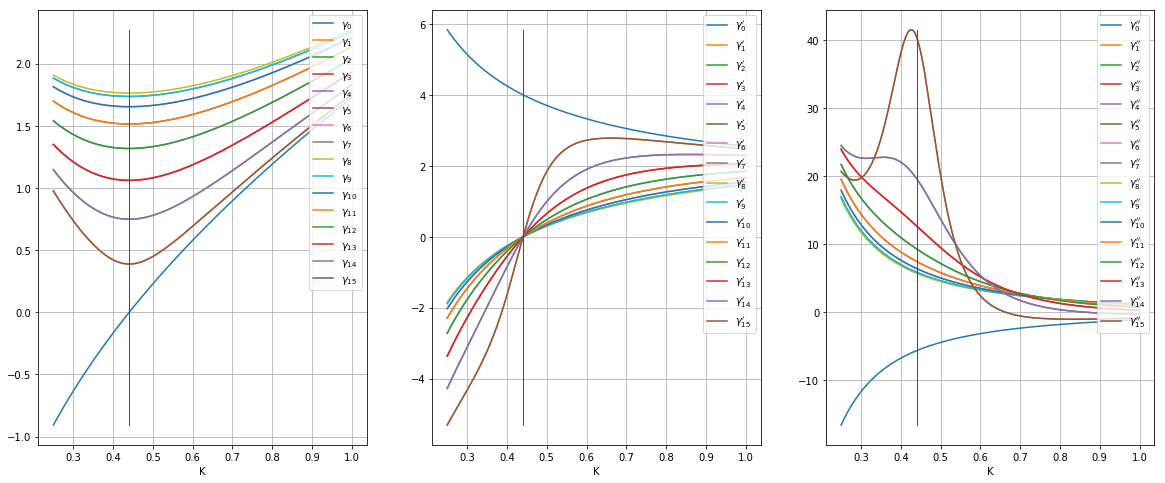

In [6]:
n = 2**3
T_min = 1
T_max = 4

T_array, K_array, gamma_array, gamma_prime_array, gamma_prime2_array = gamma_arrange(n, T_min, T_max)
Kc = J/(kB*Tc)

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
for j in range(2*n):    
    plt.plot(K_array, gamma_array[:,j], label = ('$\gamma_{%g}$' %(j)))
plt.plot([Kc, Kc], [np.min(gamma_array), np.max(gamma_array)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('K')

plt.subplot(1, 3, 2)
for j in range(2*n):    
    plt.plot(K_array, gamma_prime_array[:,j], label = ('$\gamma^{\prime}_{%g}$' %(j)))
plt.plot([Kc, Kc], [np.min(gamma_prime_array), np.max(gamma_prime_array)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('K')

plt.subplot(1, 3, 3)
for j in range(2*n):    
    plt.plot(K_array, gamma_prime2_array[:,j], label = ('$\gamma^{\prime\prime}_{%g}$' %(j)))
plt.plot([Kc, Kc], [np.min(gamma_prime2_array), np.max(gamma_prime2_array)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('K')

Note that all $\gamma_r$  functions are positive values, except $\gamma_0$, which changes the sign at $K=K_c = \frac{J}{k_B T_c}$.

---

### $Z_1, Z_2, Z_3, Z_4$
The canonical partition function reads:
$$
  Z(K) = \frac{1}{2} \left(2\sinh(2K)\right)^{mn/2} (Z_1(K) + Z_2(K) + Z_3(K) + Z_4(K)),
$$
where
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r}). $$

Note that $Z_4$ changes sign at critical point. $Z_1, Z_2, Z_3$ are alwayas positive. 

---
Define $Z_1$, $Z_2$, $Z_3$, $Z_4$ directly:

In [7]:
def Z1234(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    Z1 = np.prod(2*np.cosh(m/2* gamma(T, n)[1::2]))
    Z2 = np.prod(2*np.sinh(m/2* gamma(T, n)[1::2]))
    Z3 = np.prod(2*np.cosh(m/2* gamma(T, n)[0::2]))
    Z4 = np.prod(2*np.sinh(m/2* gamma(T, n)[0::2]))
    return Z1, Z2, Z3, Z4

Check that $Z_4$ changes sign at critical point ($T_c = 2.269$), while $Z_1, Z_2, Z_3$ are alwayas positive. 

Define a function that arranges $Z_1, Z_2, Z_3, Z_4$ from $T_{min}$ to $T_{max}$ in a numpy array:

In [8]:
def Z1234_arrange(m, n, T_min, T_max):
    T_array = np.linspace(T_min, T_max, 1000)
    Z1234_array = np.zeros((len(T_array), 4))
    for i in range(len(T_array)):
        Z1, Z2, Z3, Z4 = Z1234(T_array[i], m, n)
        Z1234_array[i, 0] = Z1
        Z1234_array[i, 1] = Z2
        Z1234_array[i, 2] = Z3
        Z1234_array[i, 3] = Z4
    return T_array, Z1234_array

Plot $Z_1, Z_2, Z_3, Z_4$ versus $T$:

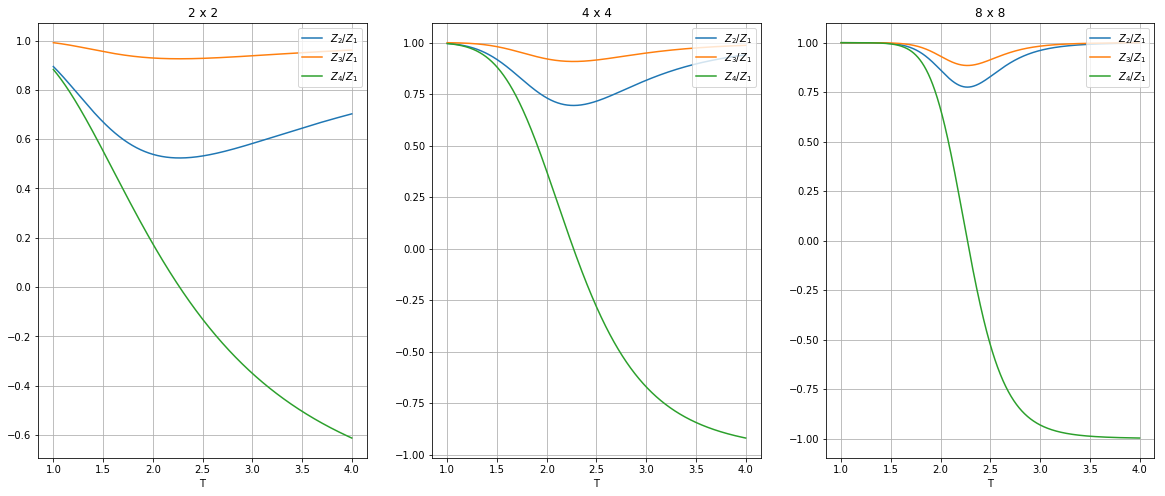

In [51]:
N = 3
m_array = 2**(np.arange(N) + 1)   # m = 2, 4, 8
T_min = 1
T_max = 4

plt.figure(figsize=(20, 8))
for j in range(N):
    T_array = np.linspace(T_min, T_max, 1000)
    plt.subplot(1, N, j+1)
    _,Z2_over_Z1,Z3_over_Z1,Z4_over_Z1 = zip(*[lnZ1_and_Z234_over_Z1(T, m_array[j], 1+m_array[j]) for T in T_array])
    plt.plot(T_array, Z2_over_Z1, label = '$Z_2/Z_1$')
    plt.plot(T_array, Z3_over_Z1, label = '$Z_3/Z_1$')
    plt.plot(T_array, Z4_over_Z1, label = '$Z_4/Z_1$')
#     plt.plot([Tc, Tc], [np.min(Z1234_array), np.max(Z1234_array)], linewidth = 1, color='r')
    plt.title('%g x %g' %(m_array[j], m_array[j]))
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('T')

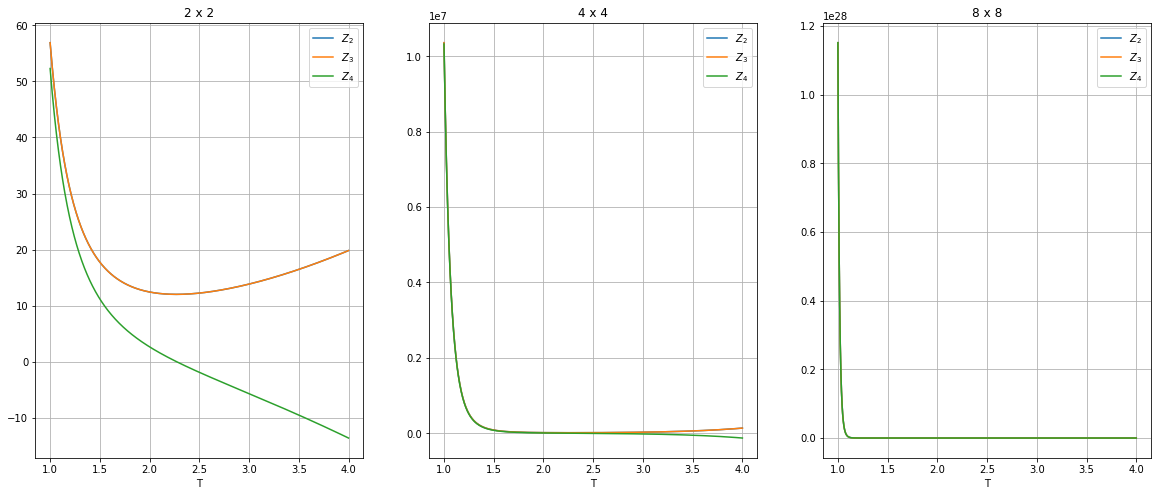

In [83]:
N = 3
m_array = 2**(np.arange(N) + 1)   # m = 2, 4, 8
T_min = 1
T_max = 4

plt.figure(figsize=(20, 8))
for j in range(N):
    plt.subplot(1, N, j+1)
    T_array, Z1234_array = Z1234_arrange(m_array[j], m_array[j], T_min, T_max)
    for i in range(1,4):
        plt.plot(T_array, Z1234_array[:, i], label = ('$Z_%g$' %(i+1)))
#     plt.plot([Tc, Tc], [np.min(Z1234_array), np.max(Z1234_array)], linewidth = 1, color='r')
    plt.title('%g x %g' %(m_array[j], m_array[j]))
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('T')

---
### $\ln(Z)$
The log of the partition function reads:
$$
  \frac{\ln Z}{mn}=  \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) + \frac{1}{mn} \ln(Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)),
$$
or
$$
  \frac{\ln Z}{mn} = \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) 
  + \frac{1}{mn} \ln(Z_1(K))
  + \frac{1}{mn} \ln\left[ 1+ \frac{Z_2(K)}{Z_1(K)}+\frac{Z_3(K)}{Z_1(K)}+\frac{Z_4(K)}{Z_1(K)} \right].
$$

---
#### Method 1: Calculate ${\frac{\ln(Z)} {mn}}$ directly using $Z_1, Z_2, Z_3, Z_4$:

In [10]:
def lnZ_over_mn_1(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    Z1, Z2, Z3, Z4 = Z1234(T, m, n)
    lnZ_over_mn = 1/(m*n)*np.log(1/2) + 1/2*np.log(2*np.sinh(2*K)) + 1/(m*n)*np.log(Z1) + 1/(m*n)*np.log(1 + Z2/Z1 + Z3/Z1 + Z4/Z1)
    return lnZ_over_mn

Check the largest size that can be reached without overflow:

In [12]:
N = 10
m_array = 2**(np.arange(N) + 1)   # m = 2, 4, 8, ..., 1024

T = 3
for m in m_array:
    n = m
    print('ln(Z)/(m*n) = %-10f for %g x %g\n '% (lnZ_over_mn_1(T, m, n), m, n))

ln(Z)/(m*n) = 0.927922   for 2 x 2
 
ln(Z)/(m*n) = 0.830065   for 4 x 4
 
ln(Z)/(m*n) = 0.816585   for 8 x 8
 
ln(Z)/(m*n) = 0.815888   for 16 x 16
 
ln(Z)/(m*n) = 0.815883   for 32 x 32
 
ln(Z)/(m*n) = nan        for 64 x 64
 
ln(Z)/(m*n) = nan        for 128 x 128
 
ln(Z)/(m*n) = nan        for 256 x 256
 
ln(Z)/(m*n) = nan        for 512 x 512
 
ln(Z)/(m*n) = nan        for 1024 x 1024
 


C:\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cosh
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in sinh
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in

---
#### Method 2: Calculate ${\frac{\ln(Z)} {mn}}$ using $\ln Z_1, \frac{Z_2} {Z_1}, \frac{Z_3} {Z_1}, \frac{Z_4} {Z_1}$:

Recall that
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r}). $$

Hence
$$ \ln{Z_1} = \sum_{r=0}^{n-1} \ln\big[2\cosh(\frac{m}{2} \gamma_{2r+1})\big], $$ 
$$ \frac{Z_2}{Z_1} = \prod_{r=0}^{n-1} \frac{\sinh(\frac{m}{2} \gamma_{2r+1})}{\cosh(\frac{m}{2} \gamma_{2r+1})}, $$
$$ \frac{Z_3}{Z_1} = \prod_{r=0}^{n-1} \frac{\cosh(\frac{m}{2} \gamma_{2r})}{\cosh(\frac{m}{2} \gamma_{2r+1})}, $$ 
$$ \frac{Z_4}{Z_1} = \prod_{r=0}^{n-1} \frac{\sinh(\frac{m}{2} \gamma_{2r})}{\cosh(\frac{m}{2} \gamma_{2r+1})}. $$

In [89]:
T = 2.28
m= n = 8
print(sorted((np.sinh(m/2* gamma(T, n)[1::2])) / (np.cosh(m/2* gamma(T, n)[1::2]))))
print(sorted((np.cosh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2]))))
print(sorted((np.sinh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2]))))

[0.9140064572766005, 0.9140064572766007, 0.999587373059112, 0.999587373059112, 0.9999890245290084, 0.9999890245290084, 0.999998131726655, 0.999998131726655]
[0.2867360912165876, 0.4059272313447763, 0.4544983217322571, 0.719158680252354, 1.1154043899354997, 1.7430711395468226, 2.786479661421751, 4.0498412318844474]
[-0.013591213726432256, 0.28529371248834673, 0.45447417268302065, 0.7191560823904, 1.1154027149618133, 1.7430648429417468, 2.7863316062335963, 4.029469171915161]


In [13]:
def lnZ1_and_Z234_over_Z1(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    lnZ1       = np.sum(np.log(2*np.cosh(m/2* gamma(T, n)[1::2])))
    Z2_over_Z1 = np.prod((np.sinh(m/2* gamma(T, n)[1::2])) / (np.cosh(m/2* gamma(T, n)[1::2])))
    Z3_over_Z1 = np.prod((np.cosh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2])))
    Z4_over_Z1 = np.prod((np.sinh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2])))
    return lnZ1, Z2_over_Z1, Z3_over_Z1, Z4_over_Z1

def lnZ_over_mn_2(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    lnZ1, Z2_over_Z1, Z3_over_Z1, Z4_over_Z1 = lnZ1_and_Z234_over_Z1(T, m, n)
    lnZ_over_mn = 1/(m*n)*np.log(1/2) + 1/2*np.log(2*np.sinh(2*K)) + 1/(m*n)*lnZ1 + 1/(m*n)*np.log(1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1)
    return lnZ_over_mn

Check the largest size that can be reached without overflow:

In [14]:
N = 10
m_array = 2**(np.arange(N) + 1)   # m = 2, 4, 8, ..., 1024

T = 3
for m in m_array:
    n = m
    print('ln(Z)/(m*n) = %-10f for %g x %g\n '% (lnZ_over_mn_2(T, m, n), m, n))

ln(Z)/(m*n) = 0.927922   for 2 x 2
 
ln(Z)/(m*n) = 0.830065   for 4 x 4
 
ln(Z)/(m*n) = 0.816585   for 8 x 8
 
ln(Z)/(m*n) = 0.815888   for 16 x 16
 
ln(Z)/(m*n) = 0.815883   for 32 x 32
 
ln(Z)/(m*n) = 0.815883   for 64 x 64
 
ln(Z)/(m*n) = 0.815883   for 128 x 128
 
ln(Z)/(m*n) = 0.815883   for 256 x 256
 
ln(Z)/(m*n) = 0.815883   for 512 x 512
 
ln(Z)/(m*n) = nan        for 1024 x 1024
 


C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cosh
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in sinh
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in cosh
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in sinh
  import sys
C:\Miniconda3\lib\site-packages\ipykern

---
#### Method 3: Calculate ${\frac{\ln(Z)} {mn}}$ using $\ln Z_1, \frac{Z_2} {Z_1}, \frac{Z_3} {Z_1}, \frac{Z_4} {Z_1}$ with approximation for large system size:

$\DeclareMathOperator{\sign}{sign}$

Recall that
$$ \ln{Z_1} = \sum_{r=0}^{n-1} \ln\big[2\cosh(\frac{m}{2} \gamma_{2r+1})\big], $$ 
$$ \frac{Z_2}{Z_1} = \prod_{r=0}^{n-1} \frac{\sinh(\frac{m}{2} \gamma_{2r+1})}{\cosh(\frac{m}{2} \gamma_{2r+1})}, $$
$$ \frac{Z_3}{Z_1} = \prod_{r=0}^{n-1} \frac{\cosh(\frac{m}{2} \gamma_{2r})}{\cosh(\frac{m}{2} \gamma_{2r+1})}, $$ 
$$ \frac{Z_4}{Z_1} = \prod_{r=0}^{n-1} \frac{\sinh(\frac{m}{2} \gamma_{2r})}{\cosh(\frac{m}{2} \gamma_{2r+1})}. $$

Since overflow encountered in $\cosh(\frac{m \gamma}{2})$ and $\sinh(\frac{m \gamma}{2})$ for large $m$, in order to calculate ${\frac{\ln(Z)} {mn}}$ for larger system size, we need to do some approximation.

Note that 
$$\cosh(\frac{m \gamma}{2}) = \frac{1}{2} [\exp(\frac{m \gamma}{2}) + \exp(-\frac{m \gamma}{2})], $$
$$\sinh(\frac{m \gamma}{2}) = \frac{1}{2} [\exp(\frac{m \gamma}{2}) - \exp(-\frac{m \gamma}{2})]. $$

For large $m$, $\cosh(\frac{m \gamma}{2})$ and $\sinh(\frac{m \gamma}{2})$ can be approximated as
$$\cosh(\frac{m \gamma}{2}) \approx \frac{1}{2} \exp\big(|\frac{m \gamma}{2}|\big), $$
$$\sinh(\frac{m \gamma}{2}) \approx \frac{1}{2} \exp\big(|\frac{m \gamma}{2}|\big) \cdot \sign\big(|\frac{m \gamma}{2}|\big). $$

Therefore, $\ln Z_1, \frac{Z_2} {Z_1}, \frac{Z_3} {Z_1}, \frac{Z_4} {Z_1}$ can be approxiamted as
$$ \ln{Z_1} \approx \sum_{r=0}^{n-1} \ln\Big[2 \cdot \frac{1}{2} \exp\big(|\frac{m \gamma_{2r+1}}{2}|\big)\Big] = \sum_{r=0}^{n-1} |\frac{m \gamma_{2r+1}}{2}| $$ 
$$ \frac{Z_2}{Z_1} = \prod_{r=0}^{n-1} \tanh\big(\frac{m}{2} \gamma_{2r+1}\big) = \exp\Big\{\sum_{r=0}^{n-1}\ln\big[\tanh\big(\frac{m}{2} \gamma_{2r+1}\big)\big]\Big\}$$
$$ \frac{Z_3}{Z_1} \approx \prod_{r=0}^{n-1} \frac{\frac{1}{2} \exp\big(|\frac{m}{2} \gamma_{2r}|\big)}{\frac{1}{2} \exp\big(|\frac{m}{2} \gamma_{2r+1}|\big)} = \prod_{r=0}^{n-1} \exp\Big( \big|\frac{m}{2} \gamma_{2r}\big| - \big|\frac{m}{2} \gamma_{2r+1}\big|\Big) = \exp\Big\{ \sum_{r=0}^{n-1}\Big(\big|\frac{m}{2} \gamma_{2r}\big| - \big|\frac{m}{2} \gamma_{2r+1}\big|\Big)\Big\}$$ 
$$ \frac{Z_4}{Z_1} \approx \prod_{r=0}^{n-1} \frac{\frac{1}{2} \exp\big(|\frac{m}{2} \gamma_{2r}|\big) \cdot \sign(\frac{m}{2} \gamma_{2r})}{\frac{1}{2} \exp\big(|\frac{m}{2} \gamma_{2r+1}|\big)} = \prod_{r=0}^{n-1} \exp\Big(\big|\frac{m}{2} \gamma_{2r}\big| - \big|\frac{m}{2} \gamma_{2r+1}\big|\Big) \cdot \sign(\gamma_{2r}) = \frac{Z_3}{Z_1} \cdot \prod_{r=0}^{n-1}\sign(\gamma_{2r})
$$

In [15]:
def lnZ1_and_Z234_over_Z1_approx(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    if m <= 512:
        lnZ1       = np.sum(np.log(2*np.cosh(m/2* gamma(T, n)[1::2])))
        Z2_over_Z1 = np.exp(np.sum(np.log(np.tanh(m/2* gamma(T, n)[1::2]))))
        Z3_over_Z1 = np.prod((np.cosh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2])))
        Z4_over_Z1 = np.prod((np.sinh(m/2* gamma(T, n)[0::2])) / (np.cosh(m/2* gamma(T, n)[1::2])))
    if m > 512:
        lnZ1       = np.sum (np.abs (m/2* gamma(T, n)[1::2]))
        Z2_over_Z1 = np.exp(np.sum(np.log(np.tanh(m/2* gamma(T, n)[1::2]))))
        Z3_over_Z1 = np.exp(np.sum(np.abs(m/2* gamma(T, n)[0::2]) - np.abs(m/2* gamma(T, n)[1::2])))
        Z4_over_Z1 = Z3_over_Z1 * np.prod(np.sign(m/2* gamma(T, n)[0::2]))
    return lnZ1, Z2_over_Z1, Z3_over_Z1, Z4_over_Z1

def lnZ_over_mn_3(T, m, n):
    beta = 1/(kB*T)
    K = beta*J
    lnZ1, Z2_over_Z1, Z3_over_Z1, Z4_over_Z1 = lnZ1_and_Z234_over_Z1_approx(T, m, n)
    lnZ_over_mn = 1/(m*n)*np.log(1/2) + 1/2*np.log(2*np.sinh(2*K)) + 1/(m*n)*lnZ1 + 1/(m*n)*np.log(1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1)
    return lnZ_over_mn

In [16]:
def eval_lnZ(N, T_min, T_max, exported_file_name):
    m_array = 2**(np.arange(N) + 1)
    T_array = np.linspace(T_min, T_max, 1000)
    for m in m_array:  
        n = m
        lnZ1_array = np.zeros_like(T_array)
        Z2_over_Z1_array = np.zeros_like(T_array)
        Z3_over_Z1_array = np.zeros_like(T_array)
        Z4_over_Z1_array = np.zeros_like(T_array)
        
        for j in range(len(T_array)):
            T = T_array[j]
            beta = 1/(kB*T)
            K = beta*J
            
            # Compute Z_1234, Z_prime_1234 and Z_prime2_1234
            lnZ1_array[j], Z2_over_Z1_array[j], Z3_over_Z1_array[j], Z4_over_Z1_array[j] = lnZ1_and_Z234_over_Z1_approx(T, m, n)
    
        data = pd.DataFrame({'T'           : T_array,
                             'lnZ_over_mn' : lnZ1_array,
                             'Z2_over_Z1'  : Z2_over_Z1_array,
                             'Z3_over_Z1'  : Z3_over_Z1_array,
                             'Z4_over_Z1'  : Z3_over_Z1_array})
        data.to_csv('%s (m = %.d).csv' %(exported_file_name, m))

N = 15
T_min = 1
T_max = 4

eval_lnZ(N, T_min, T_max, exported_file_name = 'lnZ1_and_Z234_over_Z1')

Check the largest size that can be reached without overflow:

In [17]:
N = 20
m_array = 2**(np.arange(N) + 1)   # m = 2, 4, 8, ..., 2**15

T = 3
for m in m_array:
    print('ln(Z)/(m*n) = %-10f for %g x %g\n '% (lnZ_over_mn_3(T, m, m), m, m))

ln(Z)/(m*n) = 0.927922   for 2 x 2
 
ln(Z)/(m*n) = 0.830065   for 4 x 4
 
ln(Z)/(m*n) = 0.816585   for 8 x 8
 
ln(Z)/(m*n) = 0.815888   for 16 x 16
 
ln(Z)/(m*n) = 0.815883   for 32 x 32
 
ln(Z)/(m*n) = 0.815883   for 64 x 64
 
ln(Z)/(m*n) = 0.815883   for 128 x 128
 
ln(Z)/(m*n) = 0.815883   for 256 x 256
 
ln(Z)/(m*n) = 0.815883   for 512 x 512
 
ln(Z)/(m*n) = 0.815883   for 1024 x 1024
 
ln(Z)/(m*n) = 0.815883   for 2048 x 2048
 
ln(Z)/(m*n) = 0.815883   for 4096 x 4096
 
ln(Z)/(m*n) = 0.815883   for 8192 x 8192
 
ln(Z)/(m*n) = 0.815883   for 16384 x 16384
 
ln(Z)/(m*n) = 0.815883   for 32768 x 32768
 
ln(Z)/(m*n) = nan        for 65536 x 65536
 
ln(Z)/(m*n) = nan        for 131072 x 131072
 

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in int_scalars
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in int_scalars
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars



ln(Z)/(m*n) = nan        for 262144 x 262144
 
ln(Z)/(m*n) = nan        for 524288 x 524288
 
ln(Z)/(m*n) = nan        for 1.04858e+06 x 1.04858e+06
 


---

#### $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$ 

$$ 
  \frac{Z^\prime_1}{Z_1} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right), \;
  \frac{Z^\prime_2}{Z_2} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right).
$$

$$
  \frac{Z^\prime_3}{Z_3} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right), \;
  \frac{Z^\prime_4}{Z_4} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right).
$$

---
Define function calculating $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$:

In [84]:
T = 2.28
m = n = 8
print(sorted(gamma_prime(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2])))
print(sorted(gamma_prime(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2])))
print(sorted(gamma_prime(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2])))
print((sorted(gamma_prime(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2]))))
print(Z_prime(T,m,n))

[-0.0772207023394888, -0.07722070233948873, -0.026417308291657025, -0.026417308291657022, -0.015533186493545416, -0.015533186493545409, -0.012226767633808864, -0.012226767633808864]
[-0.0924347390280398, -0.09243473902803964, -0.02643912277880971, -0.026439122778809707, -0.01553352746723446, -0.015533527467234453, -0.012226813319825027, -0.012226813319825027]
[-0.13432525929392264, -0.04078487098336317, -0.04078487098336317, -0.019394173801216618, -0.019394173801216618, -0.01335393209719485, -0.013353932097194848, -0.011877192130345314]
[-119.82227938697983, -0.04119831114109195, -0.04119831114109195, -0.019396234922967336, -0.019396234922967336, -0.013354028576208626, -0.013354028576208625, -0.01187722780176507]
(-1.0511837180680006, -1.1730736207512713, -1.1730736207512689, -479.9282150562485)


In [37]:
def Z_prime(T, m, n):
    Z1_prime_over_Z1 = m/2* np.sum(gamma_prime(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2]))
    Z2_prime_over_Z2 = m/2* np.sum(gamma_prime(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2]))
    Z3_prime_over_Z3 = m/2* np.sum(gamma_prime(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2]))
    Z4_prime_over_Z4 = m/2* np.sum(gamma_prime(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2]))  
    return Z1_prime_over_Z1, Z2_prime_over_Z2, Z3_prime_over_Z3, Z4_prime_over_Z4

In [19]:
def eval_lnZ_prime(N, T_min, T_max, exported_file_name):
    m_array = 2**(np.arange(N) + 1)
    T_array = np.linspace(T_min, T_max, 1000)
    for m in m_array:  
        n = m
        Z1_prime_over_Z1_array = np.zeros_like(T_array)
        Z2_prime_over_Z2_array = np.zeros_like(T_array)
        Z3_prime_over_Z3_array = np.zeros_like(T_array)
        Z4_prime_over_Z4_array = np.zeros_like(T_array)
        
        for j in range(len(T_array)):
            T = T_array[j]
            beta = 1/(kB*T)
            K = beta*J
            
            # Compute Z_1234, Z_prime_1234 and Z_prime2_1234
            Z1_prime_over_Z1_array[j], Z2_prime_over_Z2_array[j], Z3_prime_over_Z3_array[j], Z4_prime_over_Z4_array[j] = Z_prime(T, m, n)
    
        data = pd.DataFrame({'T'                 : T_array,
                             'Z1_prime_over_Z1'  : Z1_prime_over_Z1_array,
                             'Z2_prime_over_Z2'  : Z2_prime_over_Z2_array,
                             'Z3_prime_over_Z3'  : Z3_prime_over_Z3_array,
                             'Z4_prime_over_Z4'  : Z4_prime_over_Z4_array})
        data.to_csv('%s (m = %.d).csv' %(exported_file_name, m))

N = 15
T_min = 1
T_max = 4

eval_lnZ_prime(N, T_min, T_max, exported_file_name = 'Z_prime_over_Z')

---

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$

$\DeclareMathOperator{\sech}{sech}$

$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left\{ \gamma^{\prime \prime}_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \left[\gamma^{\prime}_{2r+1} \sech\left( \frac{m}{2}\gamma_{2r+1} \right)\right]^2 \right\},
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left\{ \gamma^{\prime \prime}_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \left[\gamma^{\prime}_{2r+1} \csch\left( \frac{m}{2}\gamma_{2r+1} \right)\right]^2 \right\},
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left\{ \gamma^{\prime \prime}_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \left[\gamma^{\prime}_{2r} \sech\left( \frac{m}{2}\gamma_{2r} \right)\right]^2 \right\},
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left\{ \gamma^{\prime \prime}_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \left[\gamma^{\prime}_{2r} \csch\left( \frac{m}{2}\gamma_{2r} \right)\right]^2 \right\},
$$

---
Define function calculating $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$. Same as previous, using approximation for $\cosh(\frac{m \gamma}{2})$ and $\sinh(\frac{m \gamma}{2})$ for large $m$:

In [20]:
def Z_prime2(T, m, n):
    if m <= 512:
        Z1_prime2_over_Z1 = (m/2* np.sum(gamma_prime(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2]) + m/2 * (gamma_prime(T, n)[1::2] * 1/np.cosh(m/2*gamma(T, n)[1::2]))**2)
        Z2_prime2_over_Z2 = (m/2* np.sum(gamma_prime(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2]) - m/2 * (gamma_prime(T, n)[1::2] * 1/np.sinh(m/2*gamma(T, n)[1::2]))**2)
        Z3_prime2_over_Z3 = (m/2* np.sum(gamma_prime(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2]) + m/2 * (gamma_prime(T, n)[0::2] * 1/np.cosh(m/2*gamma(T, n)[0::2]))**2)
        Z4_prime2_over_Z4 = (m/2* np.sum(gamma_prime(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2]) - m/2 * (gamma_prime(T, n)[0::2] * 1/np.sinh(m/2*gamma(T, n)[0::2]))**2)
    if m > 512:
        Z1_prime2_over_Z1 = (m/2* np.sum(gamma_prime(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[1::2] * np.tanh(m/2*gamma(T, n)[1::2]) + m/2 * (gamma_prime(T, n)[1::2] * 2*np.exp(-np.abs(m/2* gamma(T, n)[1::2])))**2)
        Z2_prime2_over_Z2 = (m/2* np.sum(gamma_prime(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[1::2] / np.tanh(m/2*gamma(T, n)[1::2]) - m/2 * (gamma_prime(T, n)[1::2] * 2*np.exp(-np.abs(m/2* gamma(T, n)[1::2])))**2)
        Z3_prime2_over_Z3 = (m/2* np.sum(gamma_prime(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[0::2] * np.tanh(m/2*gamma(T, n)[0::2]) + m/2 * (gamma_prime(T, n)[0::2] * 2*np.exp(-np.abs(m/2* gamma(T, n)[0::2])))**2)
        Z4_prime2_over_Z4 = (m/2* np.sum(gamma_prime(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2])))**2 + m/2 * np.sum(gamma_prime2(T, n)[0::2] / np.tanh(m/2*gamma(T, n)[0::2]) - m/2 * (gamma_prime(T, n)[0::2] * 2*np.exp(-np.abs(m/2* gamma(T, n)[0::2])))**2)
    return Z1_prime2_over_Z1, Z2_prime2_over_Z2, Z3_prime2_over_Z3, Z4_prime2_over_Z4

In [21]:
def eval_lnZ_prime2(N, T_min, T_max, exported_file_name):
    m_array = 2**(np.arange(N) + 1)
    T_array = np.linspace(T_min, T_max, 1000)
    for m in m_array:  
        n = m
        Z1_prime2_over_Z1_array = np.zeros_like(T_array)
        Z2_prime2_over_Z2_array = np.zeros_like(T_array)
        Z3_prime2_over_Z3_array = np.zeros_like(T_array)
        Z4_prime2_over_Z4_array = np.zeros_like(T_array)
        
        for j in range(len(T_array)):
            T = T_array[j]
            beta = 1/(kB*T)
            K = beta*J
            
            # Compute Z_1234, Z_prime_1234 and Z_prime2_1234
            Z1_prime2_over_Z1_array[j], Z2_prime2_over_Z2_array[j], Z3_prime2_over_Z3_array[j], Z4_prime2_over_Z4_array[j] = Z_prime2(T, m, n)
    
        data = pd.DataFrame({'T'                  : T_array,
                             'Z1_prime2_over_Z1'  : Z1_prime2_over_Z1_array,
                             'Z2_prime2_over_Z2'  : Z2_prime2_over_Z2_array,
                             'Z3_prime2_over_Z3'  : Z3_prime2_over_Z3_array,
                             'Z4_prime2_over_Z4'  : Z4_prime2_over_Z4_array})
        data.to_csv('%s (m = %.d).csv' %(exported_file_name, m))

N = 15
T_min = 1
T_max = 4

eval_lnZ_prime2(N, T_min, T_max, exported_file_name = 'Z_prime2_over_Z')

## Energy per site
$$
  \frac{U_{nm}}{nm} = - \frac{1}{nm} J \frac{d}{dK} \ln Z_{nm}
  =-J \coth(2K) - \frac{J}{mn} \frac{Z_1^\prime(K)+Z_2^\prime(K)+Z_3^\prime(K)+Z_4^\prime(K)}{Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)}
  =-J \coth(2K) - \frac{J}{mn} 
  \frac{\frac{Z_1^\prime}{Z_1}+\frac{Z_2^\prime}{Z_2}\frac{Z_2}{Z_1}+\frac{Z_3^\prime}{Z_3}\frac{Z_3}{Z_1}+\frac{Z_4^\prime}{Z_4}\frac{Z_4}{Z_1}}
  {1+\frac{Z_2}{Z_1}+\frac{Z_3}{Z_1}+\frac{Z_4}{Z_1}}.
$$

## Specific heat per site
$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

---
Both energy per site $\frac{E}{nm}$ and specific heat per site $\frac{C}{nm}$ can be calculated from the exact formulas or from the numerical derivation.

#### Exact formulas:

Define a function that calculates and exports the exact data of $\frac{\ln{Z}}{mn}$, $\frac{E_{exact}}{mn}$, $\frac{C_{exact}}{mn}$ for various system size  from temperature $T_{min}$ to $T_{max}$:

In [58]:
def eval_exact(N, T_min, T_max, exported_file_name):
    m_array = 2**(np.arange(N) + 1)
    T_array = np.linspace(T_min, T_max, 51)
    for m in m_array:  
        n = m
        lnZ_over_mn_array     = np.zeros_like(T_array)
        E_exact_over_mn_array = np.zeros_like(T_array)
        C_exact_over_mn_array = np.zeros_like(T_array)
        Z1_prime_over_Z1s     = np.zeros_like(T_array)
        Z2_prime_over_Z2s     = np.zeros_like(T_array)
        Z3_prime_over_Z3s     = np.zeros_like(T_array)
        Z4_prime_over_Z4s     = np.zeros_like(T_array)
        Z2_over_Z1s           = np.zeros_like(T_array)
        Z3_over_Z1s           = np.zeros_like(T_array)
        Z4_over_Z1s           = np.zeros_like(T_array)
        for j in range(len(T_array)):
            T = T_array[j]
            beta = 1/(kB*T)
            K = beta*J
            
            # Compute Z_1234, Z_prime_1234 and Z_prime2_1234
            lnZ1, Z2_over_Z1, Z3_over_Z1, Z4_over_Z1                                   = lnZ1_and_Z234_over_Z1(T, m, n)
            Z1_prime_over_Z1, Z2_prime_over_Z2, Z3_prime_over_Z3, Z4_prime_over_Z4     = Z_prime(T, m, n)
            Z1_prime2_over_Z1, Z2_prime2_over_Z2, Z3_prime2_over_Z3, Z4_prime2_over_Z4 = Z_prime2(T, m, n)
    
            # eval exact lnZ_over_mn, E_over_mn and C_over_mn
            lnZ_over_mn_array[j] = 1/(m*n)*np.log(1/2) + 1/2*np.log(2*np.sinh(2*K)) + 1/(m*n)*lnZ1 + 1/(m*n)*np.log(1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1)
            E_exact_over_mn_array[j]   = -J/np.tanh(2*K) - J/(m*n) * (Z1_prime_over_Z1 + Z2_prime_over_Z2 * Z2_over_Z1 + Z3_prime_over_Z3 * Z3_over_Z1 + Z4_prime_over_Z4 * Z4_over_Z1) / (1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1)
            C_exact_over_mn_array[j]   = -2*K**2/(np.sinh(2*K))**2 + K**2/(m*n) * ((Z1_prime2_over_Z1 + Z2_prime2_over_Z2 * Z2_over_Z1 + Z3_prime2_over_Z3 * Z3_over_Z1 + Z4_prime2_over_Z4 * Z4_over_Z1) / (1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1) -  ((Z1_prime_over_Z1 + Z2_prime_over_Z2 * Z2_over_Z1 + Z3_prime_over_Z3 * Z3_over_Z1 + Z4_prime_over_Z4 * Z4_over_Z1) / (1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1))**2)
            Z1_prime_over_Z1s[j]       = Z1_prime_over_Z1
            Z2_prime_over_Z2s[j]       = Z2_prime_over_Z2
            Z3_prime_over_Z3s[j]       = Z3_prime_over_Z3
            Z4_prime_over_Z4s[j]       = Z4_prime_over_Z4
            Z2_over_Z1s[j]             = Z2_over_Z1
            Z3_over_Z1s[j]             = Z3_over_Z1
            Z4_over_Z1s[j]             = Z4_over_Z1
        data = pd.DataFrame({'T'               : T_array,
                             'lnZ_over_mn'     : lnZ_over_mn_array,
                             'Z1_prime_over_Z1':Z1_prime_over_Z1s,
                             'Z2_prime_over_Z2':Z2_prime_over_Z2s,
                             'Z3_prime_over_Z3':Z3_prime_over_Z3s,
                             'Z4_prime_over_Z4':Z4_prime_over_Z4s,
                             'Z2_over_Z1s'     :Z2_over_Z1s,
                             'Z3_over_Z1s'     :Z3_over_Z1s,
                             'Z4_over_Z1s'     :Z4_over_Z1s,
                             'E_exact_over_mn' : E_exact_over_mn_array,
                             'C_exact_over_mn' : C_exact_over_mn_array})
        data.to_csv('%s (m = %.d).csv' %(exported_file_name, m))

Temperature: $T \in [1,4]$

In [63]:
N = 4
T_min = 1
T_max = 3

eval_exact(N, T_min, T_max, 
           exported_file_name = 'exact_data_test')

# exact_data = pd.read_csv('exact_data_1 (m = 4).csv')
# a = exact_data.iloc[0,:]
# print(a)

Plot $\frac{\ln{Z}}{mn}$, $\frac{E_{exact}}{mn}$, $\frac{C_{exact}}{mn}$ versus $T$:

Text(0, 0.5, '$C_{exact}$ / (m*n)')

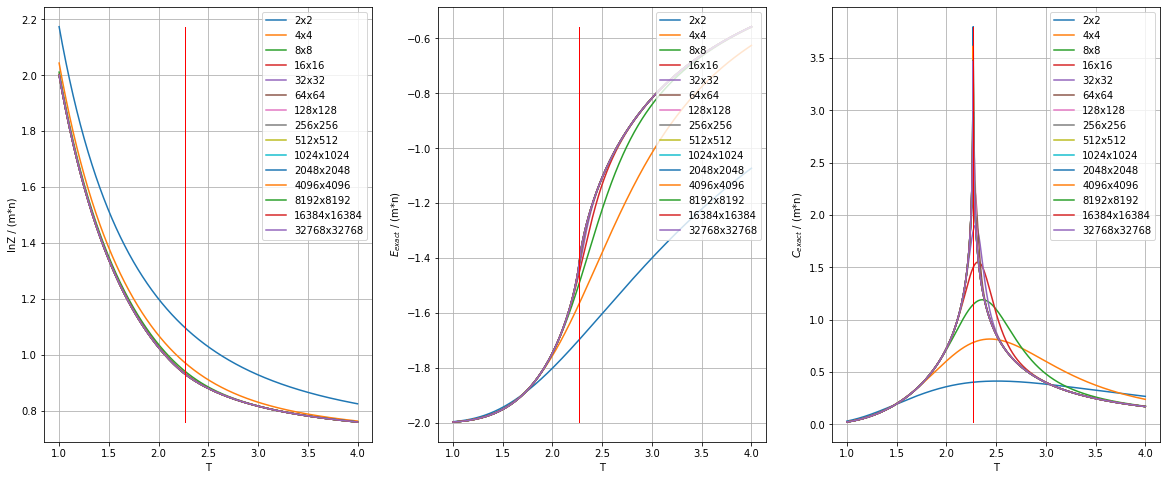

In [23]:
m_array = 2**(np.arange(N) + 1)

plt.figure(figsize=(20, 8))

# plot lnZ/(m*n) v.s. T
plt.subplot(1, 3, 1)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_1 (m = %.d).csv' %m)
    T_csv           = exact_data.iloc[:,1]
    lnZ_over_mn_csv = exact_data.iloc[:,2]
    plt.plot(T_csv, lnZ_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(lnZ_over_mn_csv))
    extremum = np.append(extremum, np.max(lnZ_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('lnZ / (m*n)')

# plot E_exact/(m*n) v.s. T
plt.subplot(1, 3, 2)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_1 (m = %.d).csv' %m)
    T_csv           = exact_data.iloc[:,1]
    E_exact_over_mn_csv = exact_data.iloc[:,3]
    plt.plot(T_csv, E_exact_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(E_exact_over_mn_csv))
    extremum = np.append(extremum, np.max(E_exact_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$E_{exact}$ / (m*n)')

# plot C_exact/(m*n) v.s. T
plt.subplot(1, 3, 3)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_1 (m = %.d).csv' %m)
    T_csv           = exact_data.iloc[:,1]
    C_exact_over_mn_csv = exact_data.iloc[:,4]
    plt.plot(T_csv, C_exact_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(C_exact_over_mn_csv))
    extremum = np.append(extremum, np.max(C_exact_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$C_{exact}$ / (m*n)')

Temperature: $T \in [T_c-0.01, T_c+0.01]$

In [ ]:
N = 15
T_min = Tc - 0.01
T_max = Tc + 0.01
eval_exact(N, T_min, T_max,
           exported_file_name = 'exact_data_2')

Plot $\frac{\ln{Z}}{mn}$, $\frac{E_{exact}}{mn}$, $\frac{C_{exact}}{mn}$ versus $T$:

In [ ]:
m_array = 2**(np.arange(N) + 1)

plt.figure(figsize=(20, 8))

# plot lnZ/(m*n) v.s. T
plt.subplot(1, 3, 1)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_2 (m = %.d).csv' %m)
    T_csv           = exact_data.iloc[:,1]
    lnZ_over_mn_csv = exact_data.iloc[:,2]
    plt.plot(T_csv, lnZ_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(lnZ_over_mn_csv))
    extremum = np.append(extremum, np.max(lnZ_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('lnZ / (m*n)')

# plot E_exact/(m*n) v.s. T
plt.subplot(1, 3, 2)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_2 (m = %.d).csv' %m)
    T_csv               = exact_data.iloc[:,1]
    E_exact_over_mn_csv = exact_data.iloc[:,3]
    plt.plot(T_csv, E_exact_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(E_exact_over_mn_csv))
    extremum = np.append(extremum, np.max(E_exact_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$E_{exact}$ / (m*n)')

# plot C_exact/(m*n) v.s. T
plt.subplot(1, 3, 3)
extremum = np.empty(0)
for m in m_array:
    exact_data = pd.read_csv('exact_data_2 (m = %.d).csv' %m)
    T_csv               = exact_data.iloc[:,1]
    C_exact_over_mn_csv = exact_data.iloc[:,4]
    plt.plot(T_csv, C_exact_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(C_exact_over_mn_csv))
    extremum = np.append(extremum, np.max(C_exact_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$C_{exact}$ / (m*n)')

#### Numerical derivation:

Define a function that calculates and exports the data of $\frac{\ln{Z}}{mn}$, $\frac{E_{num}}{mn}$, $\frac{C_{num}}{mn}$ for various system size  from temperature $T_{min}$ to $T_{max}$:

In [ ]:
def eval_numerical(N, T_min, T_max, imported_file_name, exported_file_name):
    m_array = 2**(np.arange(N) + 1)
    T_array = np.linspace(T_min, T_max, 1000)
    K_array = J / (kB*T_array)
    
    for m in m_array:  
        n = m
        exact_data = pd.read_csv('%s (m = %.d).csv' %(imported_file_name, m))
        lnZ_over_mn_csv = exact_data.iloc[:,2]
        E_num_over_mn_array = -J * np.gradient(lnZ_over_mn_csv, K_array)
        C_num_over_mn_array = np.gradient(E_num_over_mn_array, T_array)
        
        data = pd.DataFrame({'T'             : T_array,
                             'lnZ_over_mn'   : lnZ_over_mn_csv,
                             'E_num_over_mn' : E_num_over_mn_array,
                             'C_num_over_mn' : C_num_over_mn_array})
        data.to_csv('%s (m = %.d).csv'%(exported_file_name, m))

Temperature: $T \in [1,4]$

In [ ]:
N = 15
T_min = 1
T_max = 4
eval_numerical(N, T_min, T_max, 
               imported_file_name = 'exact_data_1',
               exported_file_name = 'numerical_data_1')

Plot $\frac{\ln{Z}}{mn}$, $\frac{E_{num}}{mn}$, $\frac{C_{num}}{mn}$ versus $T$:

In [ ]:
m_array = 2**(np.arange(N) + 1)

plt.figure(figsize=(20, 8))

# plot lnZ/(m*n) v.s. T
plt.subplot(1, 3, 1)
extremum = np.empty(0)
for m in m_array:
    numerical_data  = pd.read_csv('numerical_data_1 (m = %.d).csv' %m)
    T_csv           = numerical_data.iloc[:,1]
    lnZ_over_mn_csv = numerical_data.iloc[:,2]
    plt.plot(T_csv, lnZ_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(lnZ_over_mn_csv))
    extremum = np.append(extremum, np.max(lnZ_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('lnZ / (m*n)')

# plot E_exact/(m*n) v.s. T
plt.subplot(1, 3, 2)
extremum = np.empty(0)
for m in m_array:
    numerical_data = pd.read_csv('numerical_data_1 (m = %.d).csv' %m)
    T_csv             = numerical_data.iloc[:,1]
    E_num_over_mn_csv = numerical_data.iloc[:,3]
    plt.plot(T_csv, E_num_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(E_num_over_mn_csv))
    extremum = np.append(extremum, np.max(E_num_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$E_{num}$/ (m*n)')

# plot C_exact/(m*n) v.s. T
plt.subplot(1, 3, 3)
extremum = np.empty(0)
for m in m_array:
    numerical_data = pd.read_csv('numerical_data_1 (m = %.d).csv' %m)
    T_csv             = numerical_data.iloc[:,1]
    C_num_over_mn_csv = numerical_data.iloc[:,4]
    plt.plot(T_csv, C_num_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(C_num_over_mn_csv))
    extremum = np.append(extremum, np.max(C_num_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$C_{num}$ / (m*n)')

Temperature: $T \in [T_c-0.01,T_c+0.01]$







In [ ]:
N = 15
T_min = Tc - 0.01
T_max = Tc + 0.01
eval_numerical(N, T_min, T_max, 
               imported_file_name = 'exact_data_2',
               exported_file_name = 'numerical_data_2')

Plot $\frac{\ln{Z}}{mn}$, $E_{num}$, $C_{num}$ versus $T$:

In [ ]:
m_array = 2**(np.arange(N) + 1)

plt.figure(figsize=(20, 8))

# plot lnZ/(m*n) v.s. T
plt.subplot(1, 3, 1)
extremum = np.empty(0)
for m in m_array:
    numerical_data  = pd.read_csv('numerical_data_2 (m = %.d).csv' %m)
    T_csv           = numerical_data.iloc[:,1]
    lnZ_over_mn_csv = numerical_data.iloc[:,2]
    plt.plot(T_csv, lnZ_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(lnZ_over_mn_csv))
    extremum = np.append(extremum, np.max(lnZ_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('lnZ / (m*n)')

# plot E_exact/(m*n) v.s. T
plt.subplot(1, 3, 2)
extremum = np.empty(0)
for m in m_array:
    numerical_data = pd.read_csv('numerical_data_2 (m = %.d).csv' %m)
    T_csv             = numerical_data.iloc[:,1]
    E_num_over_mn_csv = numerical_data.iloc[:,3]
    plt.plot(T_csv, E_num_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(E_num_over_mn_csv))
    extremum = np.append(extremum, np.max(E_num_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$E_{num}$/ (m*n)')

# plot C_exact/(m*n) v.s. T
plt.subplot(1, 3, 3)
extremum = np.empty(0)
for m in m_array:
    numerical_data = pd.read_csv('numerical_data_2 (m = %.d).csv' %m)
    T_csv             = numerical_data.iloc[:,1]
    C_num_over_mn_csv = numerical_data.iloc[:,4]
    plt.plot(T_csv, C_num_over_mn_csv, label = ('%gx%g' %(m, m)))
    extremum = np.append(extremum, np.min(C_num_over_mn_csv))
    extremum = np.append(extremum, np.max(C_num_over_mn_csv))
plt.plot([Tc, Tc] , [np.min(extremum), np.max(extremum)], linewidth = 1, color='r')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('T')
plt.ylabel('$C_{num}$ / (m*n)')

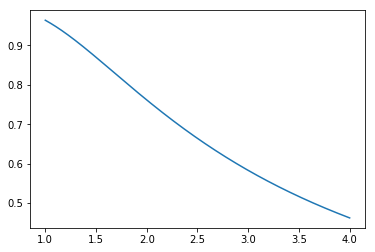

In [65]:
xs = np.linspace(1,4,1000)
ys = np.tanh(2/xs)
plt.plot(xs,ys)